The probability that n event would happen between 0 and t is given by

$ P(1) = \lambda e^{-\lambda t} $ 

In [478]:
import numpy as np
import matplotlib.pyplot as plt
import plot_settings

In [479]:
def generate_times(rate, measurement_time):
    tempi = []
    tempo_totale = 0.0

    while True:
        delta_t = np.random.exponential(scale=1/rate)
        if tempo_totale + delta_t > measurement_time:
            break
        tempo_totale += delta_t
        tempi.append(tempo_totale)

    return np.array(tempi)

In [500]:
# Parametri
lambda_rate = 2      # eventi al secondo
T_max = 100000           # tempo di osservazione (secondi)

times = generate_times(lambda_rate, T_max)
N = len(times)

print(f"Numero di eventi simulati: {N}")
print("Primi 10 intervalli:", times[:10])

Numero di eventi simulati: 199951
Primi 10 intervalli: [0.19751087 0.32714053 1.33235886 1.60145969 1.64098928 2.94434662
 4.22787613 5.01921761 5.25295858 5.82078517]


In [501]:
def signal(t, t0, tau1, tau2, V0):
    """ 
    Returns signal with CR-RC shaping
    """
    output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0

    return np.where(t>t0, output, V0)

C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in exp
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0
C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: invalid value encountered in subtract
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0
C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in multiply
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0


(280.0, 320.0)

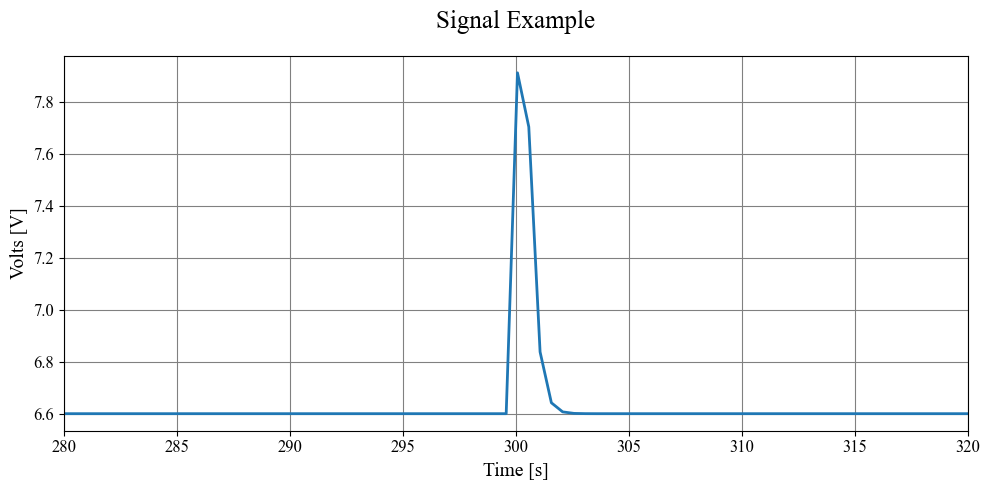

In [502]:
x = np.linspace(0,T_max, times.shape[0])
y = signal(x, 300, 0.19, 0.27, 6.6)
plt.plot(x,y)
plt.xlabel("Time [s]")
plt.ylabel('Volts [V]')
plt.title('Signal Example')
plt.xlim(280,320)

C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in exp
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0
C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: invalid value encountered in subtract
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0
C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in multiply
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0


(280.0, 320.0)

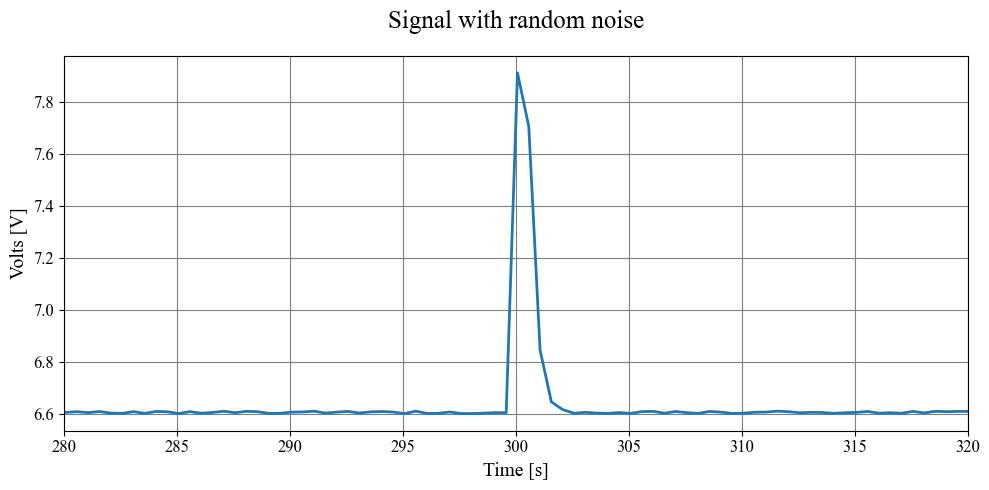

In [503]:
# Add noise to signal
y1 = signal(x, 300, 0.19, 0.27, 6.6) + 0.01 * np.random.random(times.shape[0])
plt.plot(x,y1)
plt.xlabel("Time [s]")
plt.ylabel('Volts [V]')
plt.title('Signal with random noise')
plt.xlim(280,320)

C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in exp
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0
C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: invalid value encountered in subtract
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0


(280.0, 320.0)

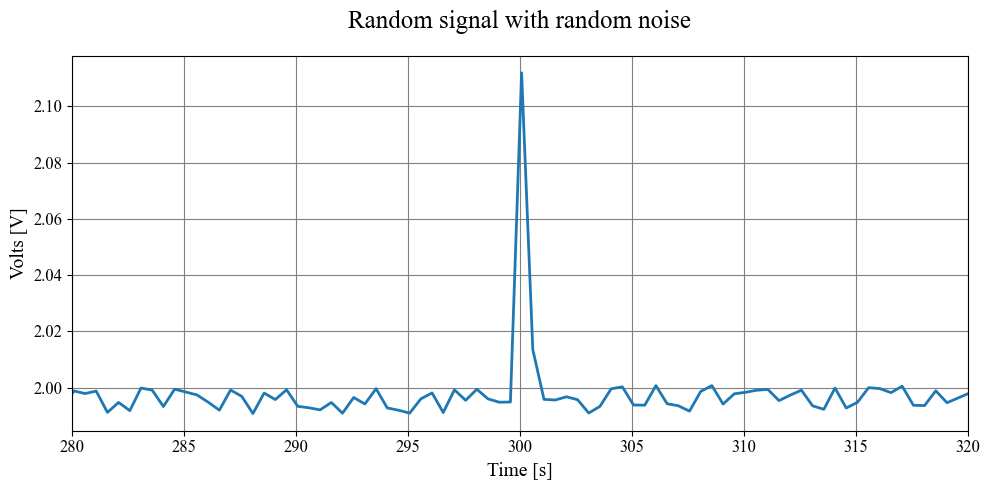

In [504]:
bl   = 2 # 2 Volts baseline 
tau1 = 19 * 1e-3
tau2 = 270 * 1e-3
V0   = bl + 0.01 * np.random.uniform(-1,1)

# Add noise to signal
y3 = signal(x, 300, tau1, tau2, V0) + 0.01 * np.random.random(times.shape[0])
plt.plot(x,y3)
plt.xlabel("Time [s]")
plt.ylabel('Volts [V]')
plt.title('Random signal with random noise')
plt.xlim(280, 320)

In [505]:
data = signal(x, times, tau1, tau2 , bl + 0.01*np.random.uniform(-1,1, times.shape[0]))

C:\Users\ricca\AppData\Local\Temp\ipykernel_6732\3877703305.py:5: RuntimeWarning: overflow encountered in exp
  output = -V0*tau1/(tau2-tau1) * (np.exp(-(t-t0)/tau1) - np.exp(-(t-t0)/tau2)) + V0


In [506]:
fs = 1000

In [507]:
factor = int(times.shape[0]/fs)

In [508]:
data = data[::factor]
x = x[::factor]

Text(0.5, 1.0, 'Signals')

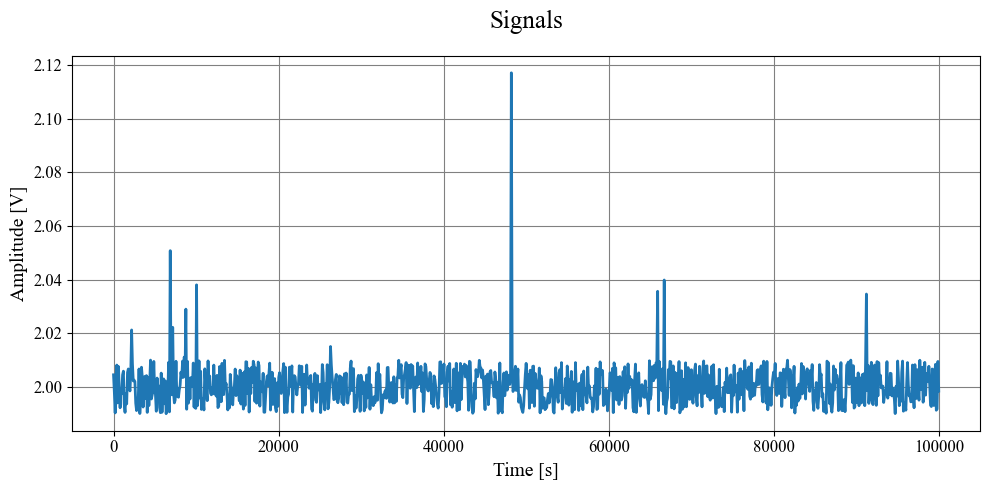

In [509]:
plt.plot(x, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.title('Signals')

## Mathed filter

In [510]:
data_fft = np.fft.fft(data)

In [511]:
temp = np.linspace(0, 30, data.shape[0])
template = signal(temp, 3, tau1, tau2, V0)

In [512]:
zero_pad = np.zeros(abs(data.size - template.size))
template_padded = np.append(template, zero_pad)
template_fft = np.fft.fft(template_padded)

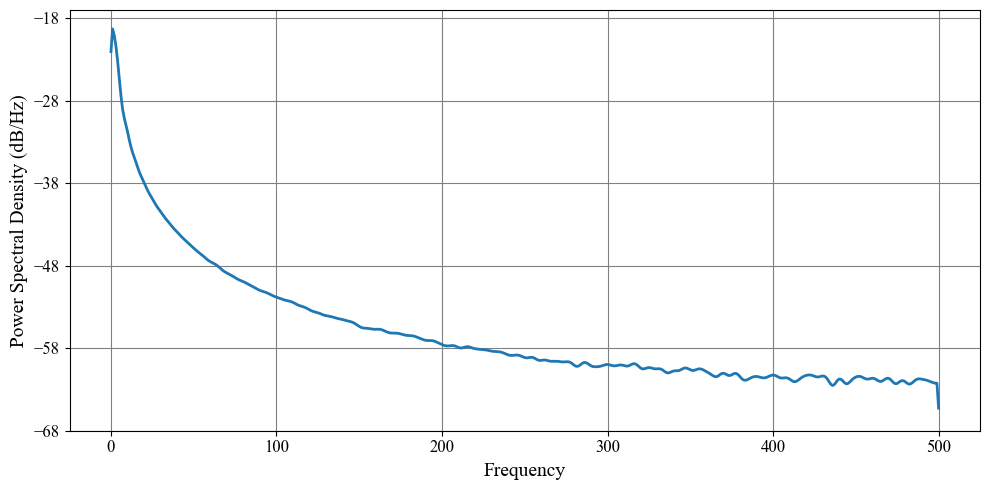

In [513]:
power_data, freq_psd = plt.psd(data[0:200], Fs=fs, NFFT=fs, visible=True)

In [514]:
datafreq = np.fft.fftfreq(data.size)*fs
power_vec = np.interp(datafreq, freq_psd, power_data)

In [515]:
# -- Calculate the matched filter output
optimal = data_fft * template_fft.conjugate() / power_vec
optimal_time = 2*np.fft.ifft(optimal)

In [516]:
# -- Normalize the matched filter output
df = np.abs(datafreq[1] - datafreq[0])
sigmasq = 2*(template_fft * template_fft.conjugate() / power_vec).sum() * df
sigma = np.sqrt(np.abs(sigmasq))
SNR = abs(optimal_time) / (sigma)

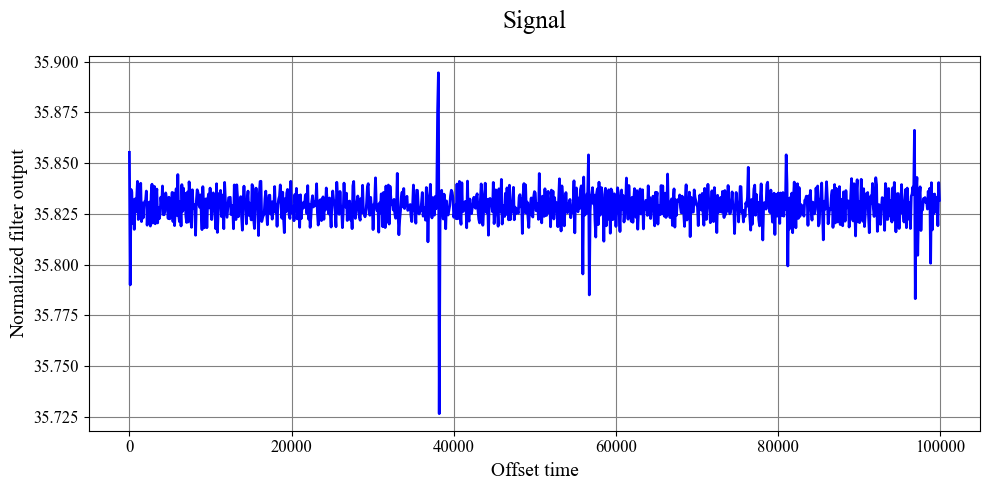

In [517]:
fig, ax = plt.subplots()
ax.plot(x,SNR, label='SNR', color='blue', alpha=1)
ax.set_title('Signal')
ax.set_xlabel('Offset time')
ax.set_ylabel('Normalized filter output')
ax.get_yaxis().get_major_formatter().set_useOffset(False)
#plt.xlim(0.5*1e6,0.6*1e6)